In [2]:
import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling 
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()
from datetime import datetime
import calendar
from scipy.stats import norm

In [3]:
def get_dataframe_from_csv(filename):
    dataset = pd.read_csv(filename)
    return dataset

def check_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    
def highest_occurance(data):
    h_o = data.value_counts()
    return h_o.head(15).plot(kind='pie', figsize = (20,12))

def lowest_occurance(data):
    l_o = data.value_counts(ascending=True)
    return l_o.plot(kind='bar', figsize=(20,12))

def lowest_occurance_pie(data):
    l_o = data.value_counts(ascending=True)
    return l_o.head(15).plot(kind='pie', figsize = (20,12))

def scatter_plot(dataset, given_data, var,y):
    target = var
    data = pd.concat([given_data, dataset[target]], axis=1)
    data.plot.scatter(x=target, y=y, ylim=(0,800000), figsize=(16,10))

def bar_plot(dataset, given_data, var,y):
    target = var
    data = pd.concat([given_data, dataset[target]], axis=1)
    data.plot.bar(x=target, y=y, ylim=(0,800000), figsize=(16,10))
    
def box_plot(dataset, given_data, var, y):
    
    data = pd.concat([given_data, dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y=y, data=data)
    fig.axis(ymin=0, ymax=800000)

def stat_graph(dataset, data, mean, median, std):
    fig, ax = plt.subplots()
 
    for key, group in dataset.groupby(data):
        group.plot(mean, median, yerr=std,
                   label=key, ax=ax)
 
    plt.show()



In [4]:
dataset = get_dataframe_from_csv("/home/forhad/Study/Self_Work/XXX/dataset_trvg_case-2.csv")

In [5]:
dataset['date_ymd'] = dataset['date_ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent
0,2020-07-29,8,1,FI,345,22,0,0,51
1,2020-04-28,41,13,US,64,5,0,0,146
2,2020-08-10,2,1,IL,64,351,5,103666,3474
3,2020-08-24,8,15,TR,139,8,0,0,48
4,2020-09-10,2,13,HK,56,7,0,0,73
...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8
1008214,2020-10-22,29,2,TW,56,53,2,25779,666
1008215,2020-12-07,15,8,ZA,56,5,0,0,44
1008216,2020-06-16,301,4,CH,56,2,0,0,3


In [6]:
dataset['month'] = dataset['date_ymd'].dt.month
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent,month
0,2020-07-29,8,1,FI,345,22,0,0,51,7
1,2020-04-28,41,13,US,64,5,0,0,146,4
2,2020-08-10,2,1,IL,64,351,5,103666,3474,8
3,2020-08-24,8,15,TR,139,8,0,0,48,8
4,2020-09-10,2,13,HK,56,7,0,0,73,9
...,...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8,4
1008214,2020-10-22,29,2,TW,56,53,2,25779,666,10
1008215,2020-12-07,15,8,ZA,56,5,0,0,44,12
1008216,2020-06-16,301,4,CH,56,2,0,0,3,6


### Multivariate Analysis 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'DateVSCost')

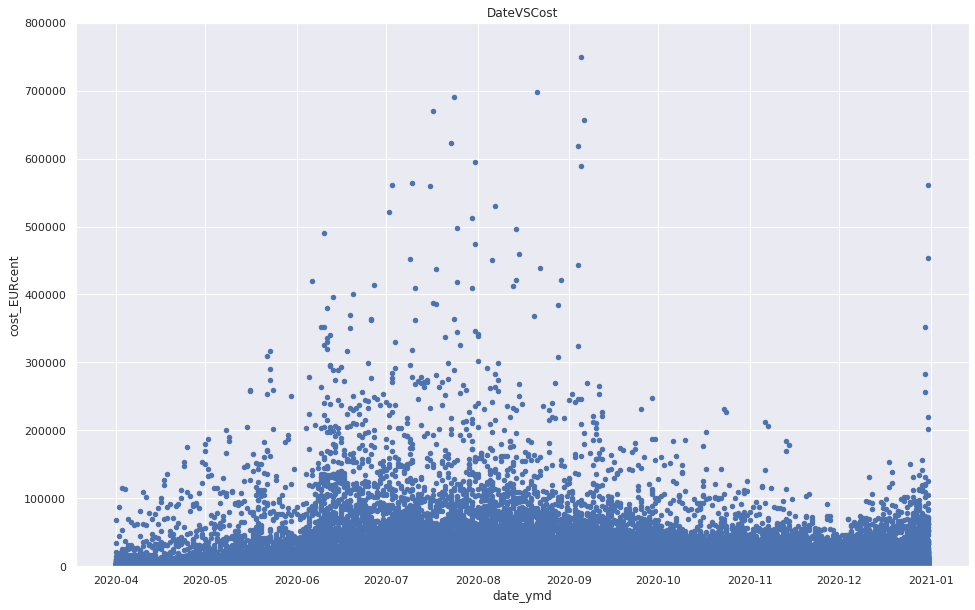

In [6]:
dataset = dataset
given_data = dataset['cost_EURcent']
var = 'date_ymd'
y = 'cost_EURcent'
scatter_plot(dataset, given_data, var, y)
plt.title('DateVSCost')

##### What the scatter plot revealed:

- The two values with bigger revenue are not following the crowd. We can speculate why this is happening. Maybe they refer to the month and that could explain the high revenue. At the beginning of September, advertisers target more audience which generates bigger profit for them and also generates revenue for XXX.

- The trend remains in stable mode starting from June to at the end of August. 


In [ ]:
dataset[dataset['time_to_travel_grouping']<1000].plot.hexbin(x='length_of_stay_grouping', y='time_to_travel_grouping', figsize=(16,8))


Monthwise charts for the travel group based on the number of nights they are staying.

Text(0.5, 1.0, 'Month vs Travel Group')

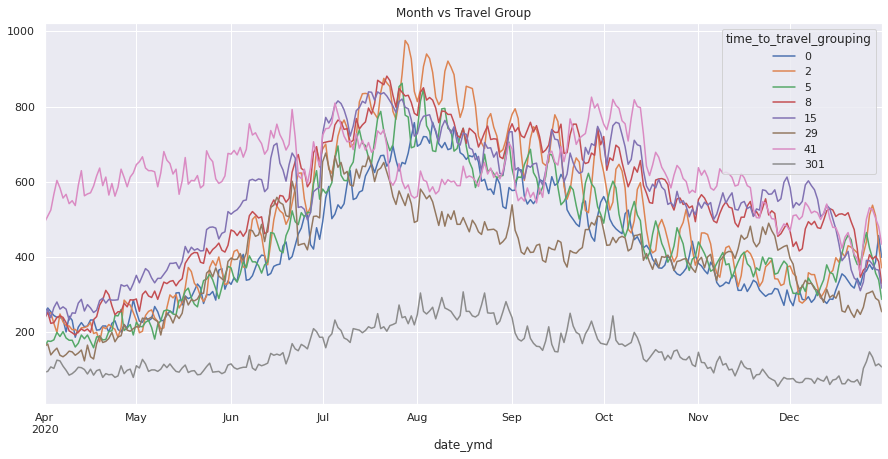

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dataset.groupby(['date_ymd','time_to_travel_grouping']).count()['length_of_stay_grouping'].unstack().plot(ax=ax)
plt.title('Month vs Travel Group')

Monthly breakdown of advertisers based on clicks. Also by clicks means revenue generation for XXX. The the next charts represents this phenomena. Those advertisers who certainly got more clicks also generate more revenue for XXX. The content, quality of advertisements, and also the offer for the travelers or travel groups is a big contribution for earning the clicks.

Text(0.5, 1.0, 'Month vs Advertisements Vs Clicks')

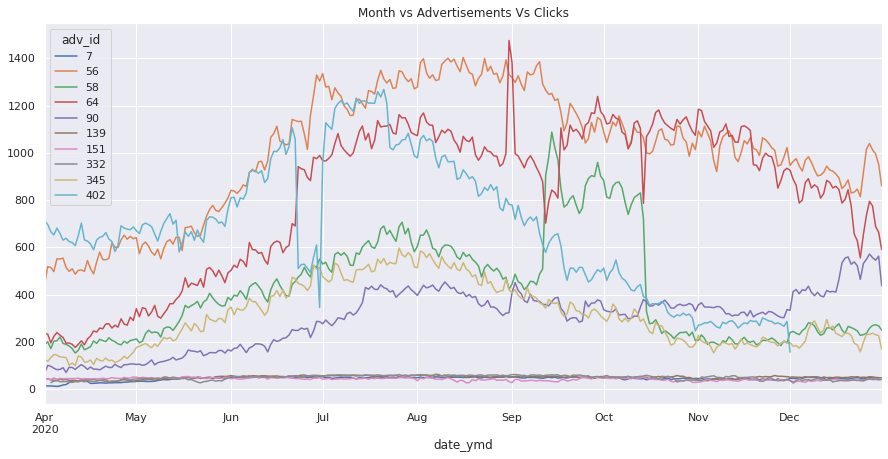

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dataset.groupby(['date_ymd','adv_id']).count()['clicks'].unstack().plot(ax=ax)
plt.title('Month vs Advertisements Vs Clicks')

Text(0.5, 1.0, 'Month vs Advertisements Vs Cost')

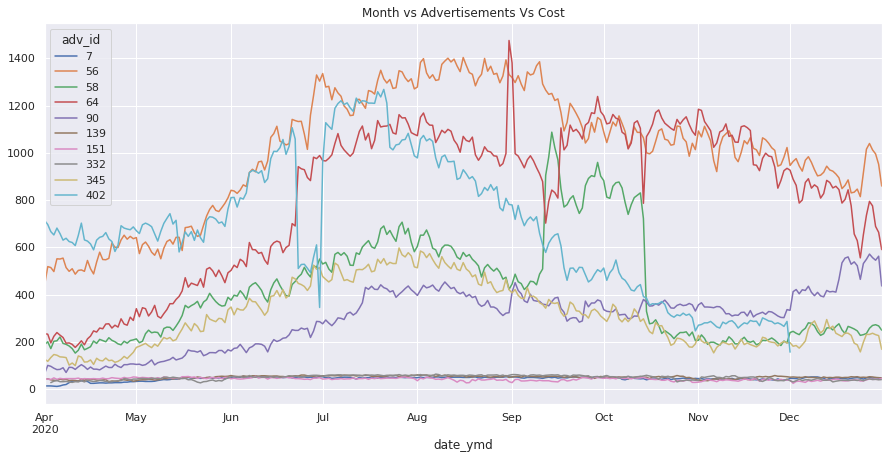

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dataset.groupby(['date_ymd','adv_id']).count()['cost_EURcent'].unstack().plot(ax=ax)
plt.title('Month vs Advertisements Vs Cost')

### Correlation Heatmap:

The 2D correlation represents colored data in two discrete diemnsions:

- The value from the first dimension appers as the row of the table and second dimensions as columns

- Correlation ranges from -1 to +1

- Close to +1 are the more positive correlation. If one increases, other will also increase and will create stronger corellation

- Close to -1 are the ones which most likely will decrease while increasing other variable

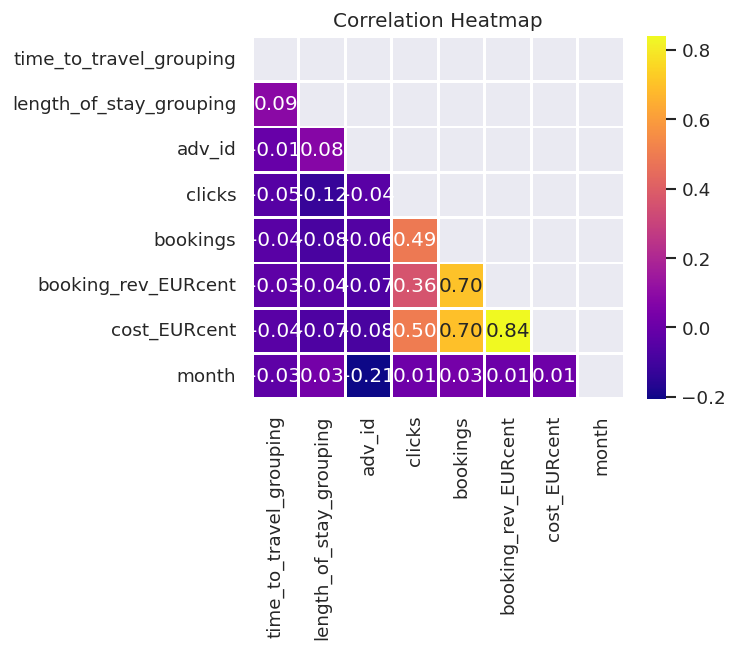

In [10]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(dataset.corr(),dtype = bool))
sns.heatmap(dataset.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Month vs Country Vs Cost')

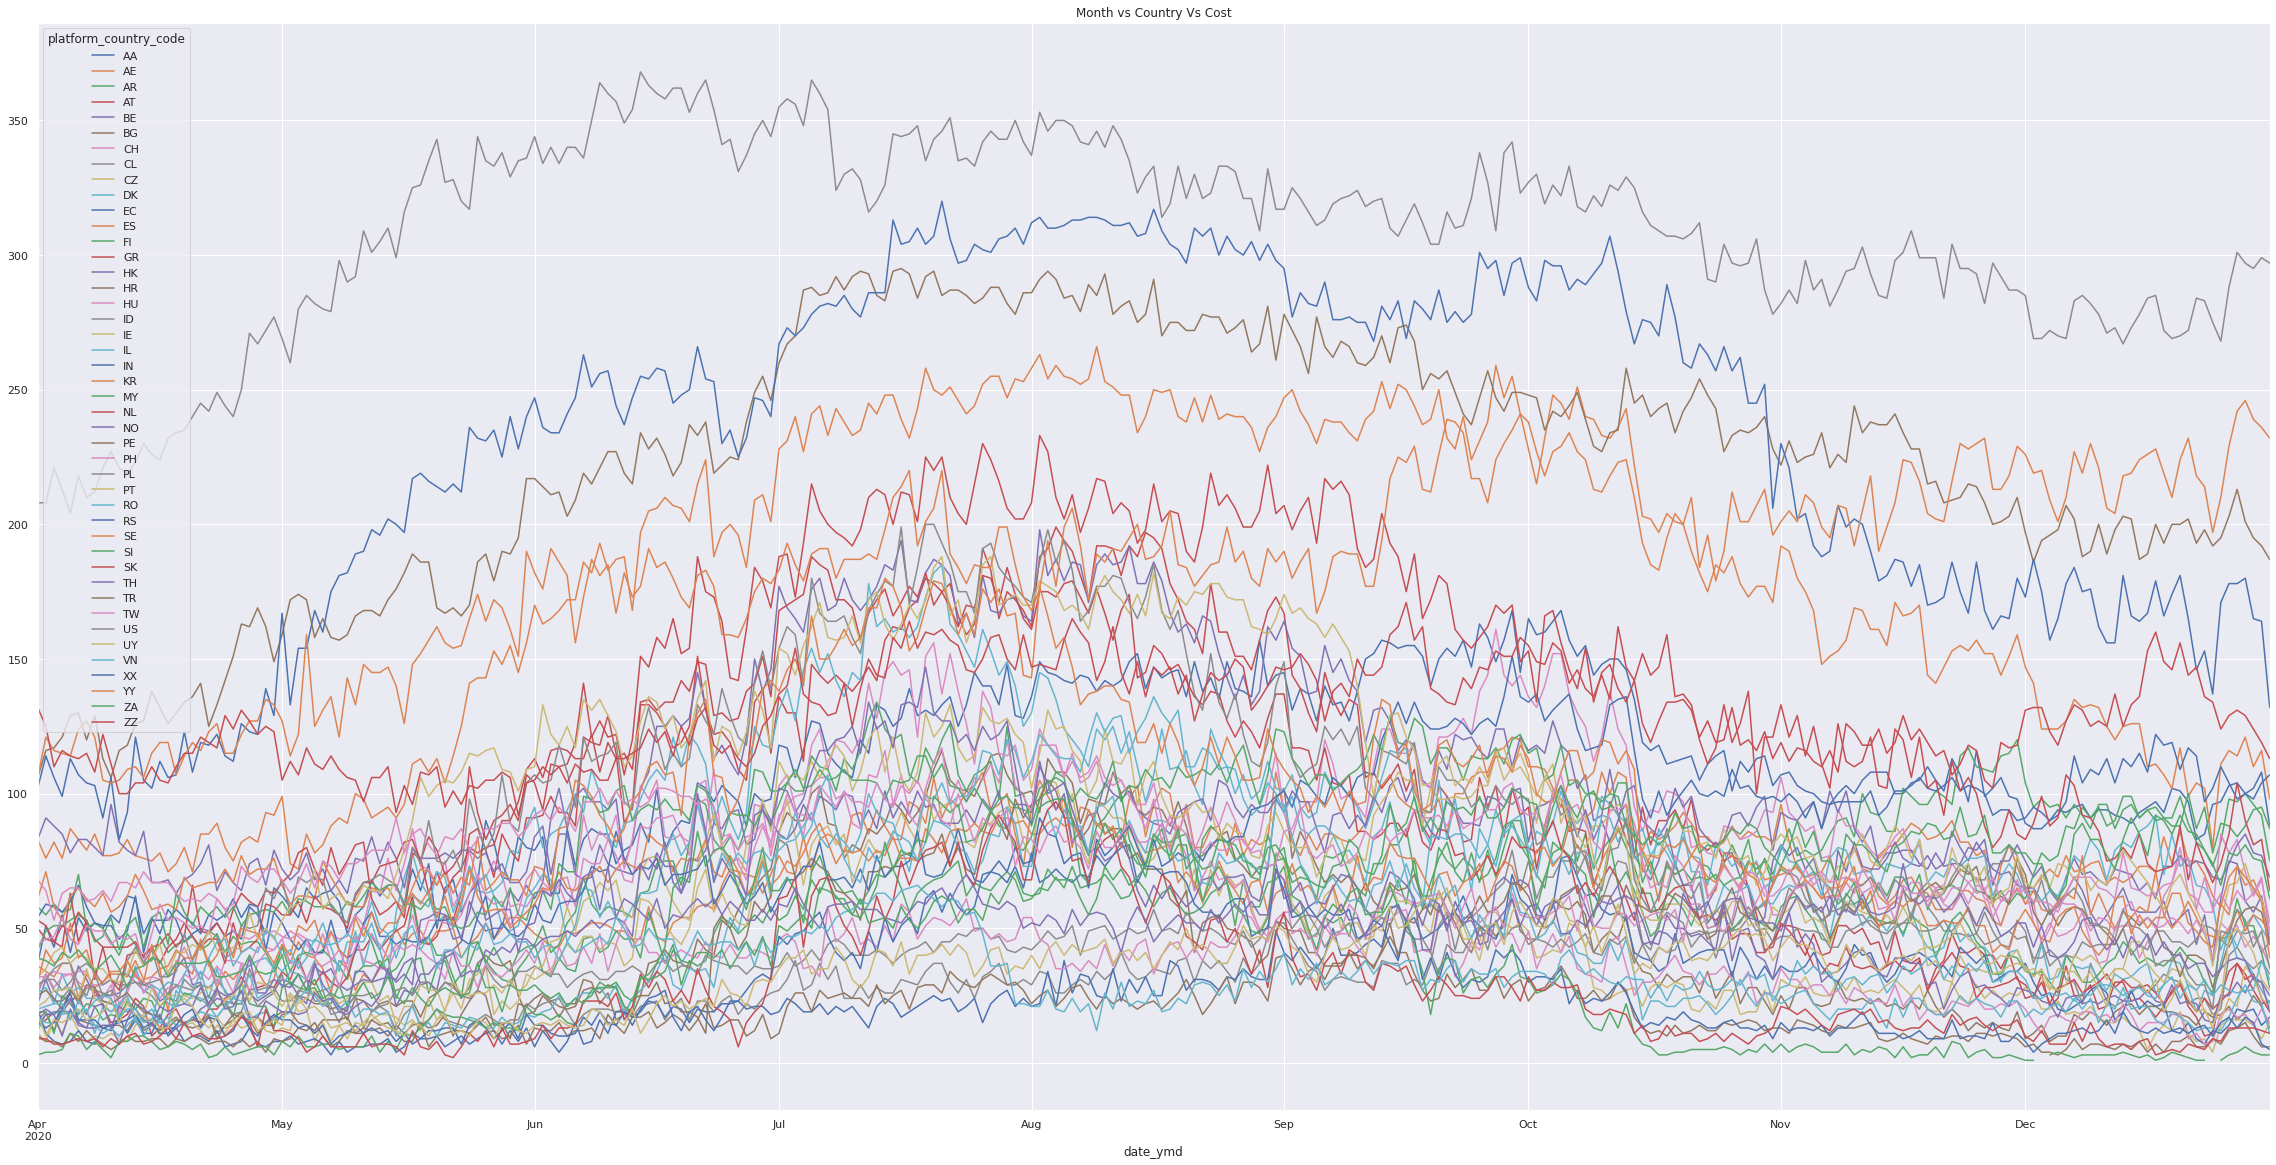

In [16]:
fig, ax = plt.subplots(figsize=(40,20))
# use unstack()
dataset.groupby(['date_ymd','platform_country_code']).count()['cost_EURcent'].unstack().plot(ax=ax)
plt.title('Month vs Country Vs Cost')

### Creating features relevant for Advertisement

- Click-through-rate (CTR), which is the percentage of how many clicks became bookings. A high CTR (2 percent as benchmark) is indicative of adverts being well recieved by a relevant audience.A low CTR suggests either both or one of these factors has not been achieved.
- Cost Per Click (CPC), on average. Represents the gross revenue earn by the advertisers


In [20]:
dataset['CTR'] = ((dataset['bookings']/dataset['clicks'])*100).map('{:,.2f}'.format)
dataset['CPC'] = (dataset['booking_rev_EURcent']/dataset['clicks'])

In [21]:
subset_df = dataset[['CTR', 'CPC', 'bookings', 'booking_rev_EURcent', 'clicks']].copy()

Text(0.5, 0.98, 'Correlation between Click data variables')

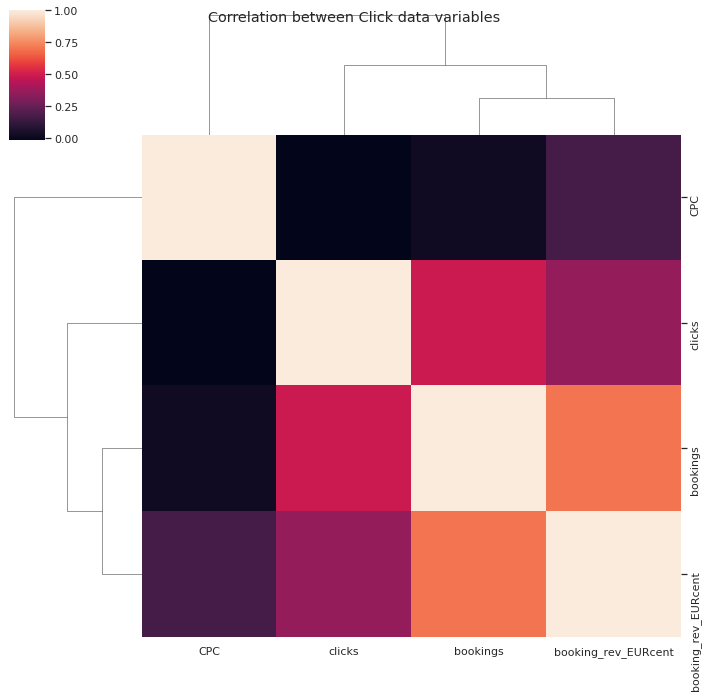

In [30]:
sns.clustermap(subset_df.corr()).fig.suptitle('Correlation between Click data variables') 

#### TTT VS BOOKING

Text(0.5, 0.98, 'time_to_travel_grouping VS booking plot')

<Figure size 1152x720 with 0 Axes>

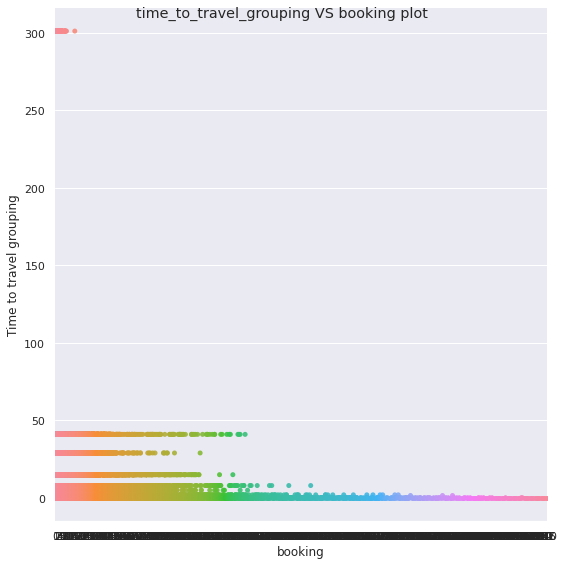

In [14]:
plt.figure(figsize=(16, 10))
chart = sns.catplot(data=dataset, x='bookings', y='time_to_travel_grouping', alpha=.9, height=8)
chart.despine(left=True)
chart.set_axis_labels("booking", "Time to travel grouping")
chart.fig.suptitle("time_to_travel_grouping VS booking plot")

#### Clicks VS Booking


<AxesSubplot:xlabel='clicks', ylabel='bookings'>

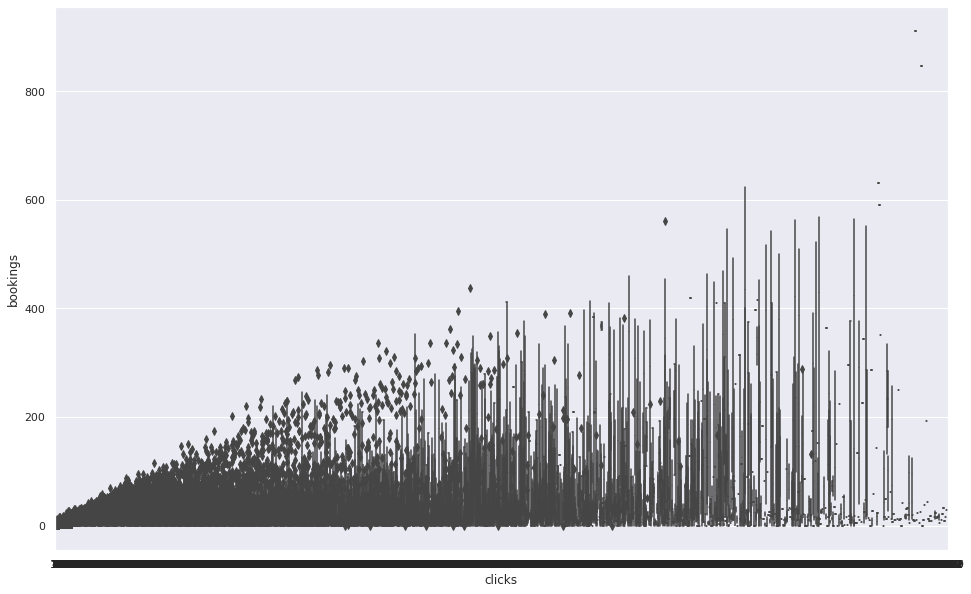

In [39]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset, x='clicks', y='bookings')

#### Country wise advertisements vs clicks

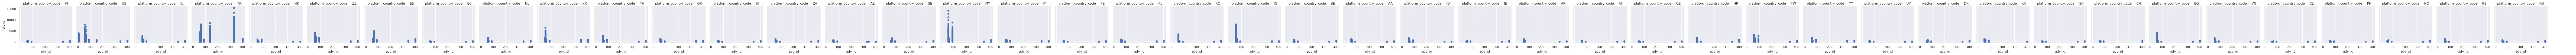

In [60]:
g = sns.FacetGrid(dataset, col="platform_country_code")
sns.set(rc={"figure.figsize":(8, 4)})
g.map(plt.scatter, "adv_id", "clicks")
g.add_legend();

##### **Please click on the images to get the better/bigger view

#### Country vs Clicks

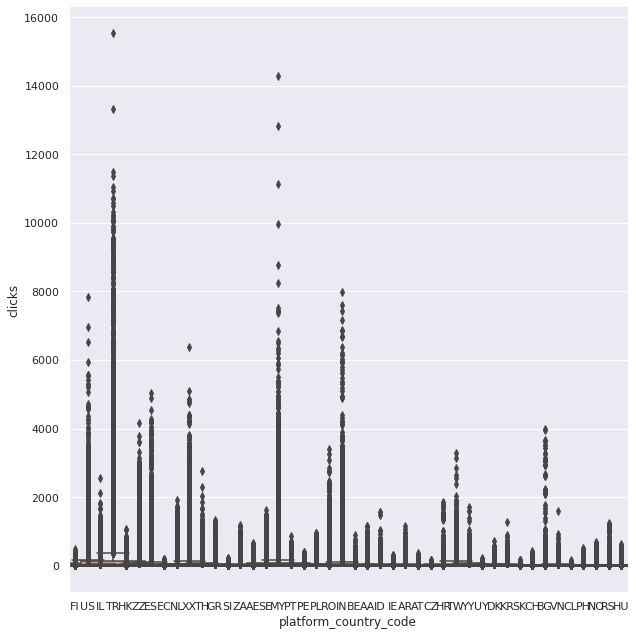

In [69]:
sns.catplot(
    data=dataset, 
    x='platform_country_code', y='clicks', kind='box',
    height=9, aspect=1, width=5
)

#### Country vs Booking revenue

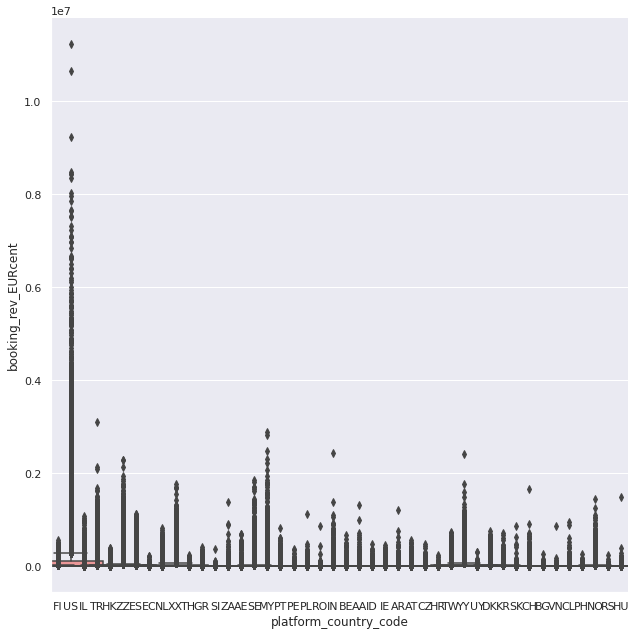

In [70]:
sns.catplot(
    data=dataset, 
    x='platform_country_code', y='booking_rev_EURcent', kind='box',
    height=9, aspect=1, width=5
)

This is an intersting follow ups from the above two figuers.

##### Country vs Clicks:

- From the grph, we can easily identify that the advertisements for the TR(Turkey) and MY(Malaysia) gets the highest number of clicks. Which means, the targeted advertisements tends to create more interest among travelers.

- The second highest groups are US(United States) and IN(India). Both countries almost had the similar clicks from the advertisements

##### Country vs Booking revenue:

- Despite having the less clicks on the advertisements, US still has the highest booking revenue. Advertiser can minimize their advertising cost from the US and could divert this budget to other countries where they generate less profit. 
- EC(Ecuador), TH(Thailand), Sl(Slovania), PH(Philippines) and RS(Serbia) are having the lowest clicks from the advertisements. To get the more clicks from this regions which will leads to profit for the advertisers, advertisers should focus more on the season aspects and offer lucrative packages.

### Pearson vs Spearman Correlation

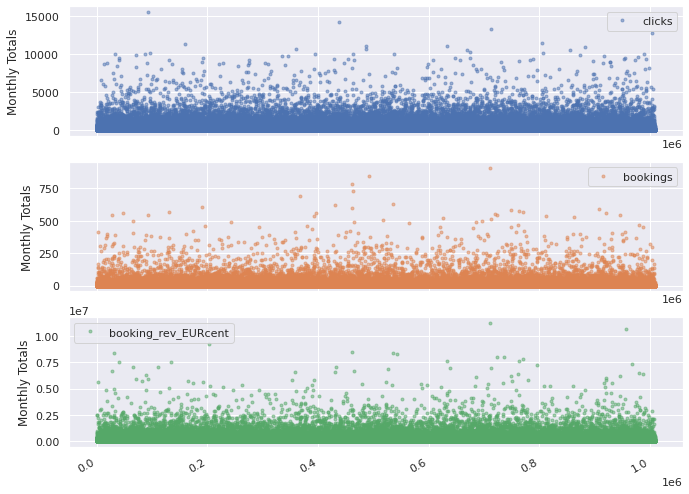

In [10]:
columns_plot = ['clicks', 'bookings', 'booking_rev_EURcent']
axis = dataset[columns_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axis:
    ax.set_ylabel('Monthly Totals')

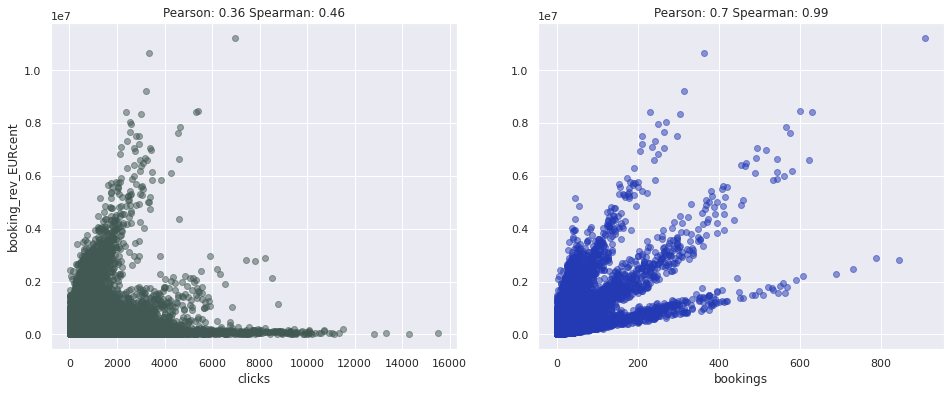

In [9]:
dataset['CTR'] = (dataset['clicks']/dataset['bookings']*100)
dataset['CPC'] = (dataset['booking_rev_EURcent']/dataset['clicks'])
subset_df = dataset[['CTR', 'CPC', 'bookings', 'booking_rev_EURcent', 'clicks']].copy()
subset_df.corr(method='pearson')

plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax=ax.flatten()

cols = ['clicks','bookings']
colors=['#415952', '#243AB5']#, '#243AB5','#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('booking_rev_EURcent')
    i.scatter(subset_df[cols[j]], subset_df['booking_rev_EURcent'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%subset_df.corr().loc[cols[j]]['booking_rev_EURcent'].round(2)+' Spearman: %s'%subset_df.corr(method='spearman').loc[cols[j]]['booking_rev_EURcent'].round(2))
    j+=1

plt.show()

- Pearson correlation evaluates the linear relationship between two continual values
- Spearman correlation evaluates the ranked values for each variable 
- Since p-value is less than 0.05, the booking_rev_EURcent has significant correlation between clicks and bookings
